## Investment Analysis Assignment

*By Wasim Khan*

#### **Project Brief:**
You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

#### **Business and Data requirement:**
1. It wants to invest between 5 to 15 million USD per round of investment
2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

#### **Company strategy:**
Spark Funds wants to invest where most other investors are investing. This pattern is often observed among early stage startup investors.

#### **Data for Analysis:**
1. Company Data (company.csv)
2. Funding details (rounds2.csv)
3. Sector classification information (mapping.csv)

#### **Business objective:**
The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

#### **Goals of data analysis:**
Goals are divided into three sub-goals:
1. Investment type analysis: Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.


2. Country analysis: Identifying the countries which have been the most heavily invested in the past.


3. Sector analysis: Understanding the distribution of investments across the eight main sectors.




In [1597]:
# Import Packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sbn

In [1598]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Checkpoint 1: Data Cleaning 1

#### Import Data from CSV files

In [1599]:
#Read data from companies.csv file. Changing encoding type because of special characters

df_companies = pd.read_csv(r'D:\Upgrad\2.3 Investment Analysis Assignment\companies.csv', encoding="ISO-8859-1")
df_companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [1600]:
#Read data from rounds2.csv file

df_rounds2 = pd.read_csv(r'D:\Upgrad\2.3 Investment Analysis Assignment\rounds2.csv', encoding="ISO-8859-1")
df_rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.000
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000


In [1601]:
#Shape of df_companies 

df_companies.shape

(66368, 10)

In [1602]:
#Info of df_companies

df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [1603]:
df_companies.name.describe()

count     66367
unique    66099
top       Roost
freq          4
Name: name, dtype: object

In [1604]:
# Shape of df_rounds2

df_rounds2.shape

(114949, 6)

In [1605]:
#Info of df_rounds2

df_rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [1606]:
df_rounds2.company_permalink.describe()

count                       114949
unique                       90247
top       /ORGANIZATION/SOLARFLARE
freq                            10
Name: company_permalink, dtype: object

In [1607]:
#Check for null columns in companies

df_companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [1608]:
df_companies.permalink.value_counts

<bound method IndexOpsMixin.value_counts of 0                                      /Organization/-Fame
1                                   /Organization/-Qounter
2                      /Organization/-The-One-Of-Them-Inc-
3                                    /Organization/0-6-Com
4                           /Organization/004-Technologies
                               ...                        
66363    /Organization/Zznode-Science-And-Technology-Co...
66364                            /Organization/Zzzzapp-Com
66365                                 /Organization/ÃEron
66366                               /Organization/ÃAsys-2
66367    /Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...
Name: permalink, Length: 66368, dtype: object>

In [1609]:
#Cleaning permalink column in df_companies
df_companies.permalink = df_companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
df_companies.permalink.value_counts

<bound method IndexOpsMixin.value_counts of 0                                      /Organization/-Fame
1                                   /Organization/-Qounter
2                      /Organization/-The-One-Of-Them-Inc-
3                                    /Organization/0-6-Com
4                           /Organization/004-Technologies
                               ...                        
66363    /Organization/Zznode-Science-And-Technology-Co...
66364                            /Organization/Zzzzapp-Com
66365                                   /Organization/Eron
66366                                 /Organization/Asys-2
66367    /Organization/Novatiff-Reklam-Ve-TanTM-Hizmetl...
Name: permalink, Length: 66368, dtype: object>

In [1610]:
#Check for null columns in rounds2

df_rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [1611]:
#Check for the type of data in company_permalink columns
df_rounds2.company_permalink.value_counts

<bound method IndexOpsMixin.value_counts of 0                                       /organization/-fame
1                                    /ORGANIZATION/-QOUNTER
2                                    /organization/-qounter
3                       /ORGANIZATION/-THE-ONE-OF-THEM-INC-
4                                     /organization/0-6-com
                                ...                        
114944                            /organization/zzzzapp-com
114945                            /ORGANIZATION/ZZZZAPP-COM
114946                                 /organization/ãeron
114947                               /ORGANIZATION/ÃASYS-2
114948    /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...
Name: company_permalink, Length: 114949, dtype: object>

In [1612]:
#Cleaning company_permalink column in df_rounds2

df_rounds2.company_permalink = df_rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
df_rounds2.company_permalink.value_counts

<bound method IndexOpsMixin.value_counts of 0                                       /organization/-fame
1                                    /ORGANIZATION/-QOUNTER
2                                    /organization/-qounter
3                       /ORGANIZATION/-THE-ONE-OF-THEM-INC-
4                                     /organization/0-6-com
                                ...                        
114944                            /organization/zzzzapp-com
114945                            /ORGANIZATION/ZZZZAPP-COM
114946                                   /organization/eron
114947                                 /ORGANIZATION/ASYS-2
114948    /organization/novatiff-reklam-ve-tantm-hizmetl...
Name: company_permalink, Length: 114949, dtype: object>

So we have non-null companies in df-companies and df_rounds2 dataset


### Q. Unique companies present in rounds2?

In [1613]:
#finding unique company values in rounds2
df_rounds2.company_permalink = df_rounds2.company_permalink.str.lower()

print(df_rounds2.company_permalink.nunique())

df_rounds2.company_permalink.describe()

66368


count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

### Q. Unique companies present in the companies?

In [1614]:
#finding unique company values in rounds2
df_companies.permalink = df_companies.permalink.str.lower()

print(df_companies.permalink.nunique())

df_companies.permalink.describe()

66368


count                     66368
unique                    66368
top       /organization/hantele
freq                          1
Name: permalink, dtype: object

### Q. How many companies in the rounds2 file which are not  present in companies

In [1615]:
comp_df_companies = pd.DataFrame(df_companies.permalink.unique())
comp_df_rounds2 = pd.DataFrame(df_rounds2.company_permalink.unique())
comp_df_companies.equals(comp_df_rounds2)

True

True resembles that both dataset have same companies

In [1616]:
#Confirm with set method difference()
set(df_companies.permalink.unique()).difference(set(df_rounds2.company_permalink.unique()))

set()

Blank set resembles there is no difference in company names in both Dataset. So the answer is *No*

### Merge the df_companies & df_rounds2 dataframes

In [1617]:
master_frame = pd.merge(df_rounds2, df_companies, how="left", left_on="company_permalink", right_on="permalink")
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.000,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.000,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [1618]:
master_frame.shape

(114949, 16)

In [1619]:
# Checking for null values in master_frame
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [1620]:
# Checking for null values % in master_frame

(master_frame.isnull().sum())/len(master_frame.index) * 100

company_permalink          0.000
funding_round_permalink    0.000
funding_round_type         0.000
funding_round_code        72.910
funded_at                  0.000
raised_amount_usd         17.390
permalink                  0.000
name                       0.001
homepage_url               5.336
category_list              2.967
status                     0.000
country_code               7.549
state_code                 9.522
region                     8.845
city                       8.842
founded_at                17.852
dtype: float64

#### Clean Merged dataset

Checking for null values in **raised_amount_usd** and imputing null rows for raised_amount_usd

In [1621]:
master_frame.raised_amount_usd.isnull().sum()


19990

In [1622]:
#Removing rows which have raised_amount_usd as Null or NaN values

master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

In [1623]:
master_frame.shape

(94959, 16)

In [1624]:
# Checking for null values % in master_frame

(master_frame.isnull().sum())/len(master_frame.index) * 100

company_permalink          0.000
funding_round_permalink    0.000
funding_round_type         0.000
funding_round_code        70.336
funded_at                  0.000
raised_amount_usd          0.000
permalink                  0.000
name                       0.001
homepage_url               4.562
category_list              1.099
status                     0.000
country_code               6.162
state_code                 8.008
region                     7.422
city                       7.419
founded_at                16.814
dtype: float64

Checking for null values in **country_code** & **category_list** and imputing null rows for them

In [1625]:
#Removing rows which have country_code and category_list as Null or NaN values

master_frame = master_frame[~((master_frame.country_code.isnull()) | (master_frame.category_list.isnull()))]

In [1626]:
master_frame.shape

(88529, 16)

In [1627]:
# Checking for null values % in master_frame

(master_frame.isnull().sum())/len(master_frame.index) * 100

company_permalink          0.000
funding_round_permalink    0.000
funding_round_type         0.000
funding_round_code        69.755
funded_at                  0.000
raised_amount_usd          0.000
permalink                  0.000
name                       0.001
homepage_url               3.672
category_list              0.000
status                     0.000
country_code               0.000
state_code                 1.955
region                     1.337
city                       1.334
founded_at                15.101
dtype: float64

In [1628]:
#Remove not required columns

master_frame = master_frame.drop(["funding_round_code","homepage_url","state_code","region","city","founded_at"],axis=1)


#for Plots
master = master_frame

In [1629]:
# Checking for null values % in master_frame

round((master_frame.isnull().sum())/len(master_frame.index) * 100,3)

company_permalink         0.000
funding_round_permalink   0.000
funding_round_type        0.000
funded_at                 0.000
raised_amount_usd         0.000
permalink                 0.000
name                      0.001
category_list             0.000
status                    0.000
country_code              0.000
dtype: float64

In [1630]:
master_frame.shape

(88529, 10)

### Sanity Checks

In [1631]:
#Check for raised_amount_usd non-null values in master_frame

master_frame[master_frame.raised_amount_usd.isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code


In [1632]:
#Check for country_code & category_list non-null values in master_frame

master_frame[((master_frame.country_code.isnull()) | (master_frame.category_list.isnull()))]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code


## Checkpoint 2: Funding Type Analysis

In [1633]:
master_frame.funding_round_type.value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [1634]:
#Supress scientific notation

pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Q. Representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) 

In [1635]:
#Finding the mean of Funding round type

master_frame[(master_frame.funding_round_type == "venture")  | (master_frame.funding_round_type == "angel")  | (master_frame.funding_round_type == "seed") | (master_frame.funding_round_type == "private_equity")].groupby(master_frame.funding_round_type)["raised_amount_usd"].mean()

funding_round_type
angel              971573.891
private_equity   73938486.275
seed               747793.682
venture          11724222.690
Name: raised_amount_usd, dtype: float64

In [1636]:
#Finding the median of Funding round type

master_frame[(master_frame.funding_round_type == "venture")  | (master_frame.funding_round_type == "angel")  | (master_frame.funding_round_type == "seed") | (master_frame.funding_round_type == "private_equity")].groupby(master_frame.funding_round_type)["raised_amount_usd"].median()

funding_round_type
angel              414906.000
private_equity   20000000.000
seed               300000.000
venture           5000000.000
Name: raised_amount_usd, dtype: float64

For further analysis, filtering the data so it only contains **Venture** as chosen investment type.

In [1637]:
#dropping other rows with fund_round_type is not Venture

master_frame = master_frame[(master_frame.funding_round_type == "venture")]

In [1638]:
master_frame.shape

(47809, 10)

#### Sanity checks

In [1639]:
master_frame[(master_frame.funding_round_type != "venture")]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code


## Checkpoint 3: Country Analysis

In [1640]:
#top nine countries which have received the highest total funding

master_frame.groupby("country_code")["raised_amount_usd"].sum().nlargest(9)

country_code
USA   420068029342.000
CHN    39338918773.000
GBR    20072813004.000
IND    14261508718.000
CAN     9482217668.000
FRA     7226851352.000
ISR     6854350477.000
DEU     6306921981.000
JPN     3167647127.000
Name: raised_amount_usd, dtype: float64

In [1641]:
#For the chosen investment type, make a data frame named top9 with the top nine countries 
#which have received the highest total funding

top9 = master_frame.pivot_table(values="raised_amount_usd", index="country_code", aggfunc=sum)
top9 = top9.sort_values(by="raised_amount_usd", ascending= False).iloc[:9]
top9

,raised_amount_usd
country_code,
USA,420068029342.000
CHN,39338918773.000
GBR,20072813004.000
IND,14261508718.000
CAN,9482217668.000
FRA,7226851352.000
ISR,6854350477.000
DEU,6306921981.000
JPN,3167647127.000


Identify the top three English-speaking countries in the data frame top9 i.e. USA, GBR and IND

In [1642]:
#Selecting the top three English-speaking countries in the data frame top9.

master_frame = master_frame[(master_frame.country_code == "USA") | (master_frame.country_code == "GBR") | (master_frame.country_code == "IND")]
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.000,/organization/-fame,#fame,Media,operating,IND
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.000,/organization/0xdata,H2O.ai,Analytics,operating,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.000,/organization/0xdata,H2O.ai,Analytics,operating,USA
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.000,/organization/0xdata,H2O.ai,Analytics,operating,USA
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.000,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA
...,...,...,...,...,...,...,...,...,...,...
114920,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.000,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA
114922,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.000,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA
114923,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.000,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.000,/organization/zyrra,Zyrra,E-Commerce,operating,USA


##### Sanity Checks

In [1643]:
#Checking for Non USA, GBR and IND data

master_frame[~((master_frame.country_code == "USA") | (master_frame.country_code == "GBR") | (master_frame.country_code == "IND"))]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code


## Checkpoint 4: Sector Analysis 1

In [1644]:
master_frame.category_list.value_counts()

Biotechnology                                                                         4633
Software                                                                              3238
Health Care                                                                           1224
Clean Technology                                                                      1040
Enterprise Software                                                                   1012
                                                                                      ... 
SaaS|Software|Travel                                                                     1
Advertising Networks|Communications Infrastructure|Promotional                           1
Advertising|Colleges|Coupons|Discounts|Loyalty Programs|Mobile|Universities              1
Events|Photography|Politics|Video|Video Streaming                                        1
Fitness|Healthcare Services|Intellectual Asset Management|Medical Devices|Tracking       1

###### Extract the primary sector of each category list from the category_list column

In [1645]:
#Extracting the primary sector of each category list from the category_list column

master_frame.category_list = master_frame.category_list.apply(lambda x : x.split('|')[0])

In [1646]:
master_frame.category_list.value_counts()

Biotechnology          5875
Software               3345
Advertising            1847
Health Care            1596
Enterprise Software    1560
                       ... 
Online Reservations       1
Rapidly Expanding         1
Space Travel              1
Mining Technologies       1
Online Scheduling         1
Name: category_list, Length: 563, dtype: int64

##### Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors 

In [1647]:
#Reading mapping.csv file

df_mapping = pd.read_csv(r"D:\Upgrad\2.3 Investment Analysis Assignment\mapping.csv")
df_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [1648]:
#Inspecting df_mapping dataframe

df_mapping.category_list.value_counts()

Enterprise Application    1
Intellectual Property     1
Security                  1
mHealth                   1
Polling                   1
                         ..
Bitcoin                   1
Angels                    1
Local                     1
Baby Safety               1
Networking                1
Name: category_list, Length: 687, dtype: int64

In [1649]:
#Cleaning df_mapping

df_mapping.category_list = df_mapping.category_list.replace({'0':'na'}, regex=True)

df_mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [1650]:
#Removing null category list

df_mapping = df_mapping[~df_mapping.category_list.isnull()]

In [1651]:
#Removing Blanks columns as it is not required main_sector

df_mapping = df_mapping.drop(columns= "Blanks", axis=1)

In [1652]:
df_mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


In [1653]:
#Mapping each primary sector to one of the eight main sectors

df_mapping = pd.melt(df_mapping, id_vars='category_list')
df_mapping

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
5491,Wholesale,"Social, Finance, Analytics, Advertising",0
5492,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
5493,Wireless,"Social, Finance, Analytics, Advertising",0
5494,Women,"Social, Finance, Analytics, Advertising",0


In [1654]:
df_mapping = df_mapping[(df_mapping.value != 0)]

In [1655]:
df_mapping = df_mapping.drop("value", axis=1)

In [1656]:
df_mapping = df_mapping.rename(columns = {"variable":"main_sector"})
df_mapping.head(100)

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
1535,Creative Industries,Entertainment
1569,Digital Entertainment,Entertainment
1570,Digital Media,Entertainment
1571,Digital Rights Management,Entertainment


In [1657]:
#merge df_mapping with master frame

master_frame = master_frame.merge(df_mapping, how="inner", on="category_list" )

##### Merged data frame with each primary sector mapped to its main sector

In [1658]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.000,/organization/-fame,#fame,Media,operating,IND,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.000,/organization/90min,90min,Media,operating,GBR,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.000,/organization/90min,90min,Media,operating,GBR,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.000,/organization/90min,90min,Media,operating,GBR,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.000,/organization/all-def-digital,All Def Digital,Media,operating,USA,Entertainment


In [1659]:
#Inspecting category_list which has no sectors

master_frame[master_frame.main_sector.isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,main_sector


In [1660]:
#Removing values which has no main_sectors

master_frame = master_frame[~master_frame.main_sector.isnull()]

In [1661]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.000,/organization/-fame,#fame,Media,operating,IND,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.000,/organization/90min,90min,Media,operating,GBR,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.000,/organization/90min,90min,Media,operating,GBR,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.000,/organization/90min,90min,Media,operating,GBR,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.000,/organization/all-def-digital,All Def Digital,Media,operating,USA,Entertainment


#### Sanity Checks

In [1662]:
#Check if null values are removed from category list

df_mapping[df_mapping.category_list.isnull()]

,category_list,main_sector


In [1663]:
#Checking values which has no main_sectors

master_frame[master_frame.main_sector.isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,main_sector


## Checkpoint 5: Sector Analysis 2

The range of funding preferred by Spark Funds is 5 to 15 million USD.

Creating 3 differernt dataframes for top 3 english speaking countries

In [1701]:
#Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding 
#type FT falling within the 5-15 million USD range.

#Total number of Investments (count) USA
D1 = master_frame[(master_frame.country_code == "USA") & (5000000 <= master_frame.raised_amount_usd)  & (15000000 >= master_frame.raised_amount_usd)]
len(D1.index)

12012

In [1702]:
#Total number of Investments (count) GBR
D2 = master_frame[(master_frame.country_code == "GBR") & (5000000 <= master_frame.raised_amount_usd)  & (15000000 >= master_frame.raised_amount_usd)]
len(D2.index)

619

In [1703]:
#Total number of Investments (count) IND
D3 = master_frame[(master_frame.country_code == "IND") & (5000000 <= master_frame.raised_amount_usd)  & (15000000 >= master_frame.raised_amount_usd)]
len(D3.index)

328

#### Q. Total number of Investments (count)

In [1667]:
#Total number of Investments (count)

print('C1 - ',D1.raised_amount_usd.count())
print('C2 - ',D2.raised_amount_usd.count())
print('C3 - ',D3.raised_amount_usd.count())

C1 -  12012
C2 -  619
C3 -  328


#### Q. Total amount of investment (USD)

In [1705]:
#Total amount of investment (USD)

print('Total amount of investment (USD) C1 - USA -',round(D1.raised_amount_usd.sum()))
print('Total amount of investment (USD) C2 - GBR -',round(D2.raised_amount_usd.sum()))
print('Total amount of investment (USD) C3 - IND -',round(D3.raised_amount_usd.sum()))

Total amount of investment (USD) C1 - USA - 107318294664
Total amount of investment (USD) C2 - GBR - 5365228300
Total amount of investment (USD) C3 - IND - 2949543602


<br>

### Sector-wise Investment Analysis - USA

In [1669]:
#Top Sector name (no. of investment-wise)
D1.groupby('main_sector')['raised_amount_usd'].sum()

main_sector
Automotive & Sports                        1454104361.000
Cleantech / Semiconductors                21206628192.000
Entertainment                              5099197982.000
Health                                     8211859357.000
Manufacturing                              7258553378.000
News, Search and Messaging                13959567428.000
Others                                    26321007002.000
Social, Finance, Analytics, Advertising   23807376964.000
Name: raised_amount_usd, dtype: float64

In [1670]:
#Number of investments in top sector (3)
top3_usa = D1.groupby('main_sector')['raised_amount_usd'].count()
top3_usa

main_sector
Automotive & Sports                         167
Cleantech / Semiconductors                 2300
Entertainment                               591
Health                                      909
Manufacturing                               799
News, Search and Messaging                 1582
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Name: raised_amount_usd, dtype: int64

In [1671]:
#Top 3 sectors in USA

top3_usa = top3_usa.sort_values(ascending=False)
top3_usa.head(3)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
Name: raised_amount_usd, dtype: int64

#### Q. Top sector count-wise i.e **Others**, which company received the highest investment? (USA)

In [1706]:
comp1_c1 = D1[D1.main_sector == 'Others'].pivot_table( columns='main_sector',index='permalink', values='raised_amount_usd',aggfunc='sum')

In [1673]:
#Sorting and getting company with highest investment in Others sector
comp1_c1= comp1_c1.sort_values(by='Others', ascending=False)
comp1_c1.head(1)

main_sector,Others
permalink,
/organization/virtustream,64300000.000


#### Second best sector count-wise, which company received the highest investment? - USA
##### Social, Finance, Analytics, Advertising

In [1707]:
comp2_c1 = D1[D1.main_sector == 'Social, Finance, Analytics, Advertising'].pivot_table( columns='main_sector',index='permalink', values='raised_amount_usd',aggfunc='sum')

In [1675]:
#Sorting and getting company with highest investment in Social, Finance, Analytics, Advertising

comp2_c1= comp2_c1.sort_values(by='Social, Finance, Analytics, Advertising', ascending=False)
comp2_c1.head(1)

main_sector,"Social, Finance, Analytics, Advertising"
permalink,
/organization/shotspotter,67933006.000


<br>

### Sector-wise Investment Analysis - GBR

In [1676]:
#Top Sector name (no. of investment-wise)
D2.groupby('main_sector')['raised_amount_usd'].sum()

main_sector
Automotive & Sports                        167051565.000
Cleantech / Semiconductors                1150139665.000
Entertainment                              482784687.000
Health                                     214537510.000
Manufacturing                              361940335.000
News, Search and Messaging                 615746235.000
Others                                    1283624289.000
Social, Finance, Analytics, Advertising   1089404014.000
Name: raised_amount_usd, dtype: float64

In [1677]:
#Top Sector name (no. of investment-wise)
top3_gbr = D2.groupby('main_sector')['raised_amount_usd'].count()

In [1678]:
#Top 3 sectors in GBR

top3_gbr = top3_gbr.sort_values(ascending=False)
top3_gbr.head(3)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
Name: raised_amount_usd, dtype: int64

#### Q. Top sector count-wise i.e **Others**, which company received the highest investment? (GBR)

In [1708]:
#Grouping values for GBR 'Other' sector

comp1_c2 = D2[D2.main_sector == 'Others'].pivot_table( columns='main_sector',index='permalink', values='raised_amount_usd',aggfunc='sum')

In [1680]:
#Sorting and getting company with highest investment in Others sector
comp1_c2= comp1_c2.sort_values(by='Others', ascending=False)
comp1_c2.head(1)

main_sector,Others
permalink,
/organization/electric-cloud,37000000.000


#### Second best sector count-wise, which company received the highest investment? - GBR
##### Social, Finance, Analytics, Advertising

In [1709]:
#Grouping values for Social, Finance, Analytics, Advertising sector

comp2_c2 = D2[D2.main_sector == 'Social, Finance, Analytics, Advertising'].pivot_table( columns='main_sector',index='permalink', values='raised_amount_usd',aggfunc='sum')

In [1710]:
#Sorting and getting company with highest investment in 'Social, Finance, Analytics, Advertising' sector
comp2_c2= comp2_c2.sort_values(by='Social, Finance, Analytics, Advertising', ascending=False)
comp2_c2.head(1)

main_sector,"Social, Finance, Analytics, Advertising"
permalink,
/organization/celltick-technologies,37500000.000


<br>

### Sector-wise Investment Analysis - IND

In [1683]:
#Top Sector name (no. of investment-wise)
D3.groupby('main_sector')['raised_amount_usd'].sum()

main_sector
Automotive & Sports                        136900000.000
Cleantech / Semiconductors                 165380000.000
Entertainment                              280830000.000
Health                                     167740000.000
Manufacturing                              200900000.000
News, Search and Messaging                 433834545.000
Others                                    1013409507.000
Social, Finance, Analytics, Advertising    550549550.000
Name: raised_amount_usd, dtype: float64

In [1684]:
#Top Sector name (no. of investment-wise)
top3 = D3.groupby('main_sector')['raised_amount_usd'].count()

In [1685]:
#Top 3 sectors in IND

top3 = top3.sort_values(ascending=False)
top3.head(3)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Name: raised_amount_usd, dtype: int64

#### Q. Top sector count-wise i.e **Others**), which company received the highest investment? (IND)

In [1711]:
#Grouping values for IND 'Other' sector

comp1_c3 = D3[D3.main_sector == 'Others'].pivot_table( columns='main_sector',index='permalink', values='raised_amount_usd',aggfunc='sum')

In [1712]:
#Sorting
comp1_c3= comp1_c3.sort_values(by='Others', ascending=False)
comp1_c3.head(1)

main_sector,Others
permalink,
/organization/firstcry-com,39000000.000


#### Second best sector count-wise, which company received the highest investment? - IND

In [1713]:
#Grouping values for IND 'Social, Finance, Analytics, Advertising' sector

comp2_c3 = D3[D3.main_sector == 'Social, Finance, Analytics, Advertising'].pivot_table( columns='main_sector',index='permalink', values='raised_amount_usd',aggfunc='sum')

In [1689]:
#Sorting
comp2_c3= comp2_c3.sort_values(by='Social, Finance, Analytics, Advertising', ascending=False)
comp2_c3.head(1)

main_sector,"Social, Finance, Analytics, Advertising"
permalink,
/organization/manthan-systems,50700000.000


<br>

## Plots

In [1690]:
#Finding the mean of Funding round type

master[(master.funding_round_type == "venture")  | (master.funding_round_type == "angel")  | (master.funding_round_type == "seed") | (master.funding_round_type == "private_equity")].groupby(master.funding_round_type)["raised_amount_usd"].mean()

funding_round_type
angel              971573.891
private_equity   73938486.275
seed               747793.682
venture          11724222.690
Name: raised_amount_usd, dtype: float64

In [1691]:
#Finding the mean of Funding round type

master[(master.funding_round_type == "venture")  | (master.funding_round_type == "angel")  | (master.funding_round_type == "seed") | (master.funding_round_type == "private_equity")].groupby(master.funding_round_type)["raised_amount_usd"].median()

funding_round_type
angel              414906.000
private_equity   20000000.000
seed               300000.000
venture           5000000.000
Name: raised_amount_usd, dtype: float64

In [1692]:
four_ft = master[(master.funding_round_type == "venture")  | (master.funding_round_type == "angel")  | (master.funding_round_type == "seed") | (master.funding_round_type == "private_equity")]

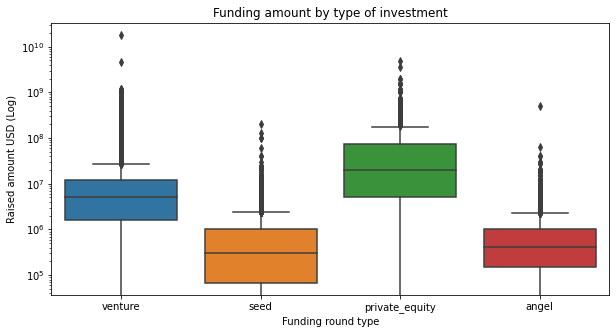

In [1714]:
plt.figure(figsize=(10,5))
sbn.boxplot(data=four_ft,x='funding_round_type',y='raised_amount_usd')
plt.yscale('log')
plt.xlabel('Funding round type')
plt.ylabel('Raised amount USD (Log)')
plt.title('Funding amount by type of investment')
plt.show()

<Figure size 1440x720 with 0 Axes>

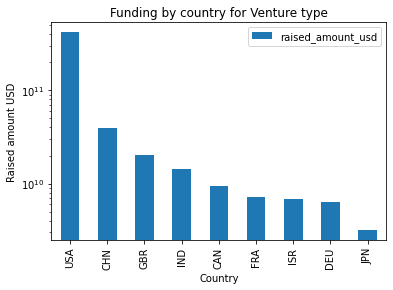

In [1694]:
plt.figure(figsize=(20,10))
top9.plot.bar()
plt.yscale('log')
plt.xlabel('Country')
plt.ylabel('Raised amount USD')
plt.title('Funding by country for Venture type')
plt.show()

<br>

##### Plot the number of investments in the top 3 sectors of the top 3 countries on one chart for Venture investment type

In [1695]:
ranges = master_frame[(master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)]

In [1696]:
sector_analysis  = ranges[(ranges.main_sector == 'Others') | 
                  (ranges.main_sector == 'Social, Finance, Analytics, Advertising') | 
                  (ranges.main_sector == 'Cleantech / Semiconductors') |
                  (ranges.main_sector == 'News, Search and Messaging')].pivot_table(values="raised_amount_usd", columns="main_sector", index="country_code", aggfunc='count')#.reset_index()

sector_analysis = sector_analysis
sector_analysis.head()

main_sector,Cleantech / Semiconductors,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
country_code,,,,
GBR,128,73,147,133
IND,20,52,110,60
USA,2300,1582,2950,2714


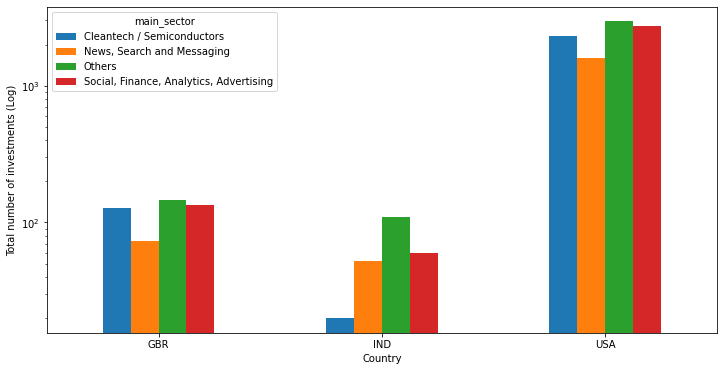

In [1697]:
sector_analysis.plot(kind="bar", stacked=False, figsize=[12,6])

plt.yscale('log')
plt.xlabel('Country')
plt.ylabel('Total number of investments (Log)')
plt.xticks(rotation=0)

plt.show()